# Expression inspection of circadian cycle genes

To make sure comparisons between day and night samples are consistent, we investigated a few maize homologs from the analysis described by [Lai et al](https://link.springer.com/article/10.1186/s12864-020-06824-3).

The selected genes have clear peaks around midday and midnight, sampling time obtained in Kremling et al 2018 used in our analyses.



In [1]:
import pandas as pd

night_expression_tpm = pd.read_csv("/home/santosrac/Projects/UGA_RACS/Transcriptome/paper2025/paper2025/kremling_expression_v5_night_tpm.tsv",
#night_expression_tpm = pd.read_csv("/home/renato/projects/fapesp_bepe_pd/transcriptome/kremling_expression_v5_night_tpm.tsv",
            sep="\t", index_col=0)
day_expression_tpm = pd.read_csv("/home/santosrac/Projects/UGA_RACS/Transcriptome/paper2025/paper2025/kremling_expression_v5_day_tpm.tsv",
#day_expression_tpm = pd.read_csv("/home/renato/projects/fapesp_bepe_pd/transcriptome/kremling_expression_v5_day_tpm.tsv",
            sep="\t", index_col=0)

print(day_expression_tpm.shape)
print(night_expression_tpm.shape)

(39096, 176)
(39096, 228)


Transform dataframe to da tidy version that can be used in downstream analyses:

In [2]:
# Day
tidy_day_expression = day_expression_tpm.reset_index().melt(id_vars='Name', var_name='Plot', value_name='TPM')
tidy_day_expression.rename(columns={'index': 'Name'}, inplace=True)
tidy_day_expression['Condition'] = 'Day'
# Night
tidy_night_expression = night_expression_tpm.reset_index().melt(id_vars='Name', var_name='Plot', value_name='TPM')
tidy_night_expression.rename(columns={'index': 'Name'}, inplace=True)
tidy_night_expression['Condition'] = 'Night'

In [3]:
# Combining both
tidy_combined_expression = pd.concat([tidy_day_expression, tidy_night_expression], ignore_index=True)
tidy_combined_expression.head()

,Name,Plot,TPM,Condition
0,Zm00001eb371370_T002,14A0253_26,1.178659,Day
1,Zm00001eb371350_T001,14A0253_26,0.000000,Day
2,Zm00001eb371330_T001,14A0253_26,0.000000,Day
3,Zm00001eb371310_T001,14A0253_26,0.000000,Day
4,Zm00001eb371280_T001,14A0253_26,1.494319,Day


Selecting the circadian genes from the pandas dataframe:

* ELF3-LIKE 1 (EF3L1) (Zm00001eb159890_T001), with higher expression at midnight
* Zm00001eb297250_T001, ZmELF3.2 (correspond to Zm00001d039156 in maize v4, identified by [Zhao et al. 2022](https://academic.oup.com/plcell/article/35/1/369/6730753))
* PRR73-LIKE (P73L) (Zm00001eb397240_T001), with higher expression at midday
* RVE7-LIKE 3 (RE7L3) (Zm00001eb072870_T003), with higher expression at midnight
* RVE7-LIKE 4 (RE7L4) (Zm00001eb428070_T001), with higher expression at midnight

In [4]:
filtered_genes_df = tidy_combined_expression[tidy_combined_expression['Name'].isin(['Zm00001eb159890_T001',
            'Zm00001eb297250_T001',
            'Zm00001eb397240_T001',
            'Zm00001eb072870_T003',
            'Zm00001eb428070_T001'])]

/tmp/ipykernel_6822/109510287.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)


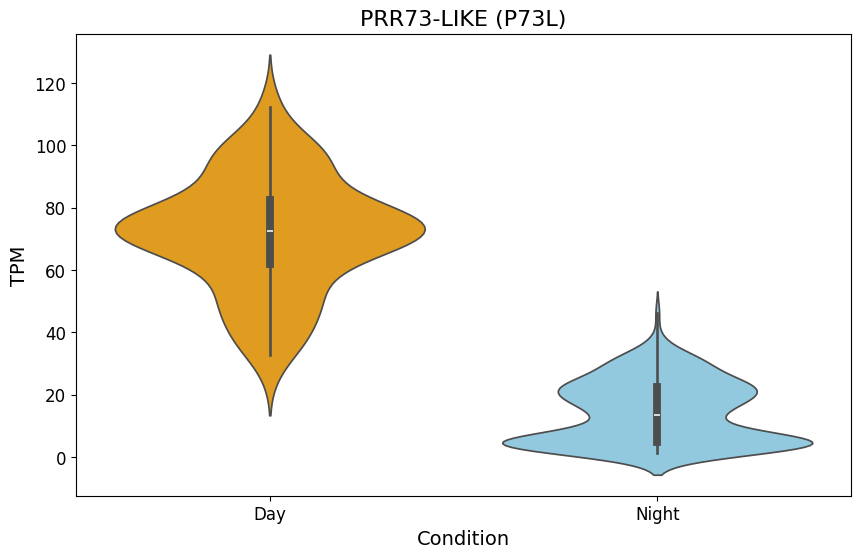

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the data for a single gene name
gene_name = 'Zm00001eb397240_T001'
palette = {'Day': 'orange', 'Night': 'skyblue'}
filtered_gene_data = filtered_genes_df[filtered_genes_df['Name'] == gene_name]

# Set font sizes
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # Axis label font size
plt.rc('xtick', labelsize=12)  # X-tick label font size
plt.rc('ytick', labelsize=12)  # Y-tick label font size

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)
plt.title(f'PRR73-LIKE (P73L)')
plt.show()

/tmp/ipykernel_6822/395902828.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)


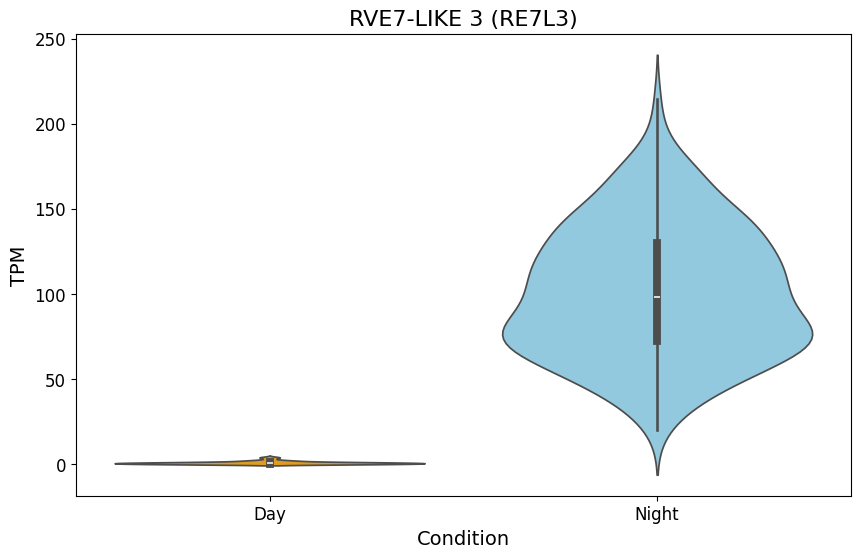

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the data for a single gene name
gene_name = 'Zm00001eb072870_T003'
palette = {'Day': 'orange', 'Night': 'skyblue'}
filtered_gene_data = filtered_genes_df[filtered_genes_df['Name'] == gene_name]

# Set font sizes
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # Axis label font size
plt.rc('xtick', labelsize=12)  # X-tick label font size
plt.rc('ytick', labelsize=12)  # Y-tick label font size

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)
plt.title(f'RVE7-LIKE 3 (RE7L3)')
plt.show()

/tmp/ipykernel_6822/298522962.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)


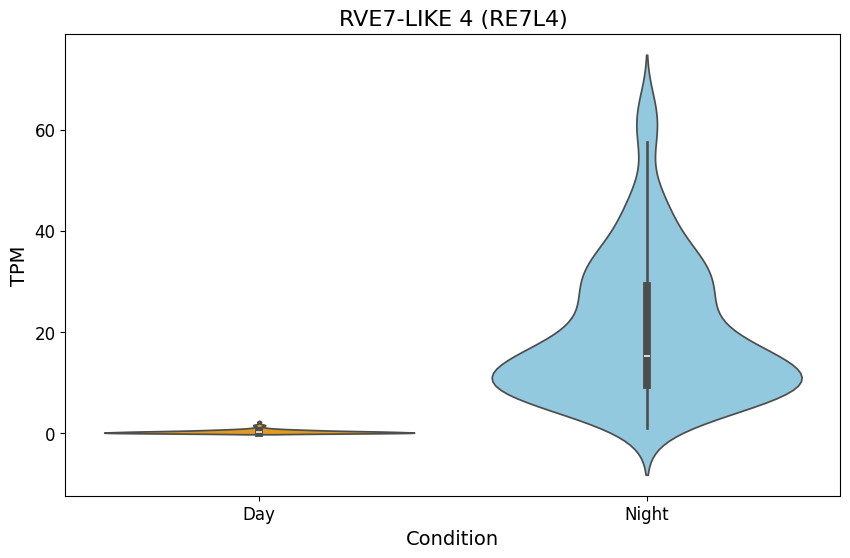

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the data for a single gene name
gene_name = 'Zm00001eb428070_T001'
palette = {'Day': 'orange', 'Night': 'skyblue'}
filtered_gene_data = filtered_genes_df[filtered_genes_df['Name'] == gene_name]

# Set font sizes
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # Axis label font size
plt.rc('xtick', labelsize=12)  # X-tick label font size
plt.rc('ytick', labelsize=12)  # Y-tick label font size

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)
plt.title(f'RVE7-LIKE 4 (RE7L4)')
plt.show()

/tmp/ipykernel_6822/2807348716.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)


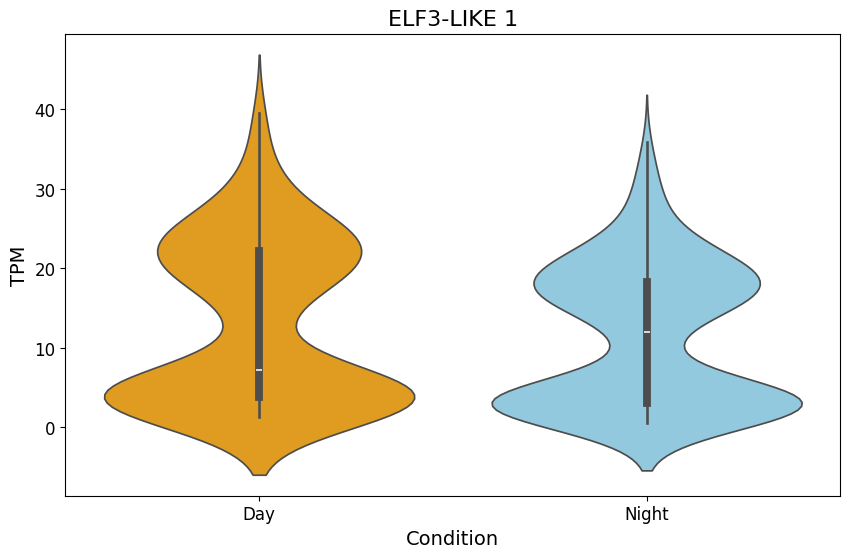

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the data for a single gene name
gene_name = 'Zm00001eb159890_T001'
palette = {'Day': 'orange', 'Night': 'skyblue'}
filtered_gene_data = filtered_genes_df[filtered_genes_df['Name'] == gene_name]

# Set font sizes
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # Axis label font size
plt.rc('xtick', labelsize=12)  # X-tick label font size
plt.rc('ytick', labelsize=12)  # Y-tick label font size

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)
plt.title(f'ELF3-LIKE 1')
plt.show()

/tmp/ipykernel_6822/533634862.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)


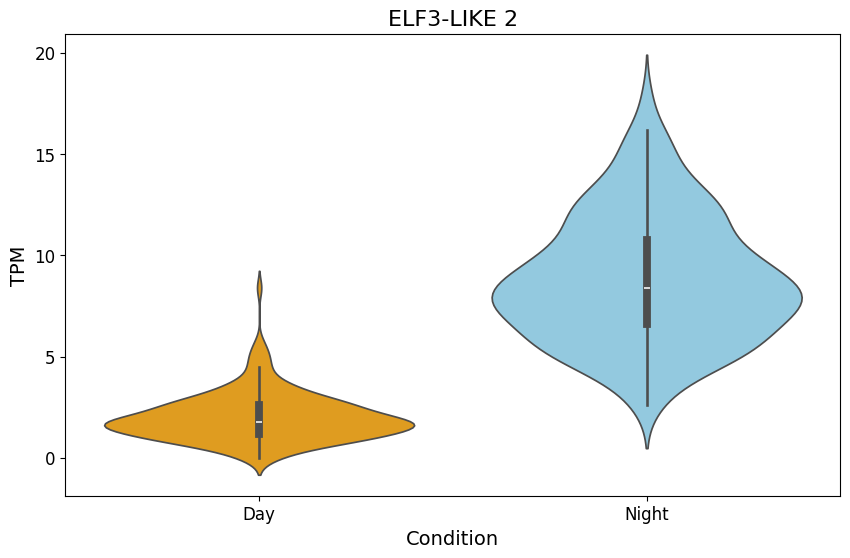

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the data for a single gene name
gene_name = 'Zm00001eb297250_T001'
palette = {'Day': 'orange', 'Night': 'skyblue'}
filtered_gene_data = filtered_genes_df[filtered_genes_df['Name'] == gene_name]

# Set font sizes
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # Axis label font size
plt.rc('xtick', labelsize=12)  # X-tick label font size
plt.rc('ytick', labelsize=12)  # Y-tick label font size

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)
plt.title(f'ELF3-LIKE 2')
plt.show()

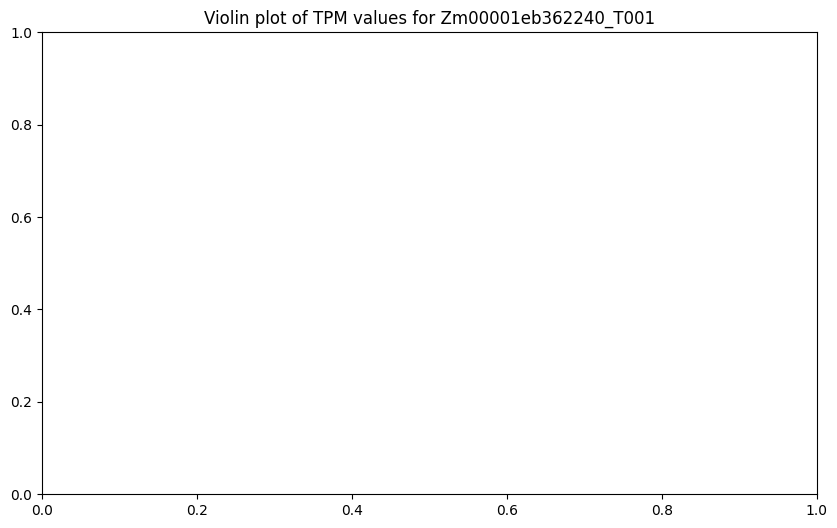

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the data for a single gene name
gene_name = 'Zm00001eb362240_T001'
palette = {'Day': 'orange', 'Night': 'skyblue'}
filtered_gene_data = filtered_genes_df[filtered_genes_df['Name'] == gene_name]

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='TPM', data=filtered_gene_data, palette=palette)
plt.title(f'Violin plot of TPM values for {gene_name}')
plt.show()